- Limpeza dos dados
- Análize das Features

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv('email_data.csv')
data.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [20]:
data.describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301,0.013240
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320,0.114301
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000,1.000000


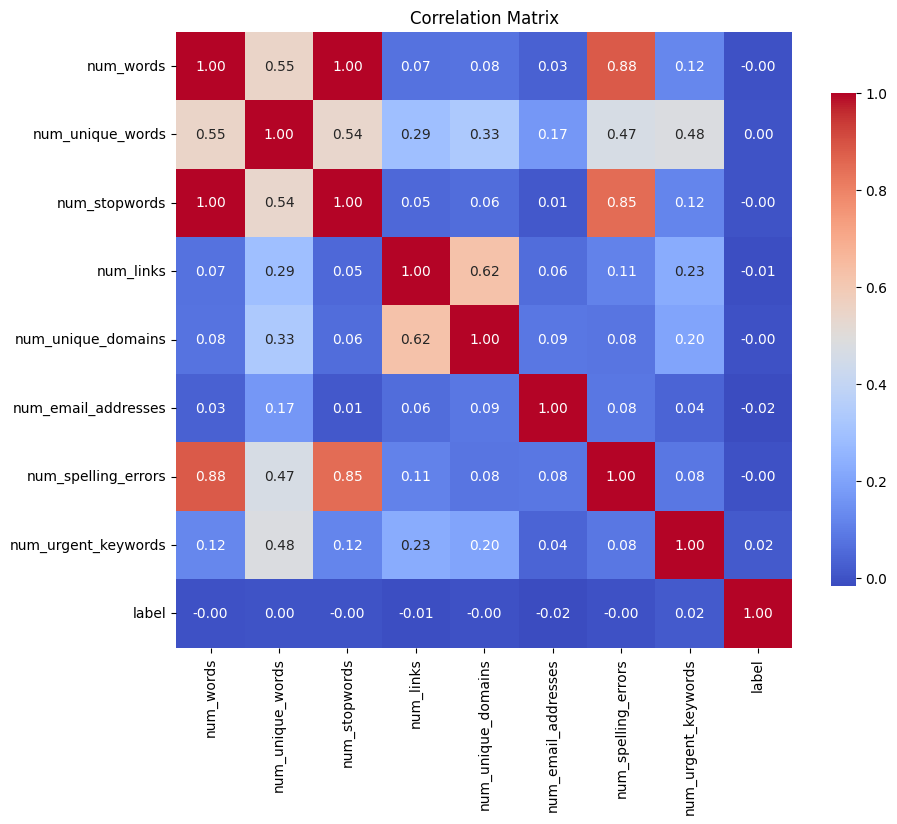

In [22]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix') 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

In [23]:
removed_features = ['num_stopwords', 'num_unique_domains']

data_selected = data.drop(columns=removed_features)
data_selected.head()

,num_words,num_unique_words,num_links,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,0,0,0,0,0
1,5,5,0,0,0,0,0
2,34,32,0,0,0,0,0
3,6,6,0,0,0,0,0
4,9,9,0,0,0,0,0


In [26]:
data['label'].value_counts()

label
0    517897
1      6949
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = data_selected.drop(columns=['label'])
y = data_selected['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78    155404
           1       0.03      0.76      0.05      2050

    accuracy                           0.64    157454
   macro avg       0.51      0.70      0.42    157454
weighted avg       0.98      0.64      0.77    157454

Confusion Matrix:
 [[99990 55414]
 [  492  1558]]
